In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sold+Listings+Report+07-09-2024.txt to Sold+Listings+Report+07-09-2024 (2).txt
Saving All+Listings+Report+06-15-2024.txt to All+Listings+Report+06-15-2024 (2).txt


In [ ]:
import pandas as pd
sdf= pd.read_csv('Sold+Listings+Report+07-09-2024.txt', sep='\t')
idf= pd.read_csv("All+Listings+Report+06-15-2024.txt", sep='\t')
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   item-name                        1719 non-null   object 
 1   item-description                 86 non-null     object 
 2   listing-id                       1719 non-null   object 
 3   seller-sku                       1719 non-null   object 
 4   price                            1719 non-null   float64
 5   quantity                         1719 non-null   int64  
 6   open-date                        1719 non-null   object 
 7   image-url                        0 non-null      float64
 8   item-is-marketplace              1719 non-null   object 
 9   product-id-type                  1719 non-null   int64  
 10  zshop-shipping-fee               0 non-null      float64
 11  item-note                        0 non-null      float64
 12  item-condition      

In [ ]:
import pandas as pd
import numpy as np

# creating a Function to check if a column contains only "NaN" strings
def is_all_nan_strings(column):
    return column.astype(str).eq("nan").all()

# Get list of columns to drop
columns_to_drop = [col for col in idf.columns if is_all_nan_strings(idf[col])]

#drop the columns
df1= idf.drop(columns=columns_to_drop)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   item-name                1719 non-null   object 
 1   item-description         86 non-null     object 
 2   listing-id               1719 non-null   object 
 3   seller-sku               1719 non-null   object 
 4   price                    1719 non-null   float64
 5   quantity                 1719 non-null   int64  
 6   open-date                1719 non-null   object 
 7   item-is-marketplace      1719 non-null   object 
 8   product-id-type          1719 non-null   int64  
 9   item-condition           1719 non-null   int64  
 10  asin1                    1719 non-null   object 
 11  product-id               1719 non-null   object 
 12  pending-quantity         1719 non-null   int64  
 13  fulfillment-channel      1719 non-null   object 
 14  merchant-shipping-group 

In [ ]:
print(f"Original number of columns: {len(df1.columns)}")

def has_all_identical_values(column):
    return column.nunique() == 1

# Get list of columns to drop
columns_to_drop = [col for col in df1.columns if has_all_identical_values(df1[col])]

# Store the values of the columns to be dropped for later printing
dropped_values = {col: df1[col].iloc[0] for col in columns_to_drop}

# Drop the columns
df1.drop(columns=columns_to_drop, inplace=True)

print(f"Number of columns after dropping: {len(df1.columns)}")
print(f"Dropped columns: {columns_to_drop}")

if columns_to_drop:
    print("\nValues in dropped columns:")
    # Print the stored values
    for col, value in dropped_values.items():
        print(f"{col}: {value}")

print("\nFirst row of cleaned DataFrame:")
print(df1.head(1))

Original number of columns: 17
Number of columns after dropping: 13
Dropped columns: ['item-is-marketplace', 'item-condition', 'pending-quantity', 'fulfillment-channel']

Values in dropped columns:
item-is-marketplace: y
item-condition: 11
pending-quantity: 0
fulfillment-channel: DEFAULT

First row of cleaned DataFrame:
                                           item-name item-description  \
0  Gora By Rabindranath Tagore & Kab tak Pukaru B...              NaN   

    listing-id    seller-sku  price  quantity                open-date  \
0  1224AM2K374  01-EEPT-MPRC  395.0        10  2023-12-24 11:51:02 IST   

   product-id-type       asin1  product-id merchant-shipping-group  status  \
0                1  B0CPT8Y5R9  B0CPT8Y5R9       Migrated Template  Active   

   maximum-retail-price  
0                 698.0  


In [ ]:

df1.rename(columns={'quantity': 'quantity_listed'}, inplace=True)
df1.rename(columns={'maximum-retail-price': 'mrp'}, inplace=True)
df1.drop(columns=["merchant-shipping-group","product-id","product-id-type","item-description","price"], inplace= True)
df1.drop_duplicates(subset=['item-name', 'seller-sku'], inplace= True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item-name        1719 non-null   object 
 1   listing-id       1719 non-null   object 
 2   seller-sku       1719 non-null   object 
 3   quantity_listed  1719 non-null   int64  
 4   open-date        1719 non-null   object 
 5   asin1            1719 non-null   object 
 6   status           1719 non-null   object 
 7   mrp              1719 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 107.6+ KB


In [ ]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   item-name            2931 non-null   object 
 1   listing-id           0 non-null      float64
 2   sku                  2931 non-null   object 
 3   price                2931 non-null   float64
 4   shipping-fee         2931 non-null   float64
 5   purchase-date        2931 non-null   object 
 6   buyer-email          2930 non-null   object 
 7   buyer-nick-name      0 non-null      float64
 8   date-listed          2809 non-null   object 
 9   item-is-marketplace  2931 non-null   object 
 10  quantity             2931 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ KB


In [ ]:
sdf.rename(columns={'quantity': 'quantity_sold'}, inplace=True)

In [ ]:
# Get list of columns to drop
columns_to_drop = [col for col in sdf.columns if is_all_nan_strings(sdf[col])]

#drop the columns
df2= sdf.drop(columns=columns_to_drop)


In [ ]:
print(f"Original number of columns: {len(df2.columns)}")


# Get list of columns to drop
columns_to_drop = [col for col in df2.columns if has_all_identical_values(df2[col])]

# Store the values of the columns to be dropped for later printing
dropped_values = {col: df2[col].iloc[0] for col in columns_to_drop}

# Drop the columns
df2.drop(columns=columns_to_drop, inplace=True)

print(f"Number of columns after dropping: {len(df2.columns)}")
print(f"Dropped columns: {columns_to_drop}")

if columns_to_drop:
    print("\nValues in dropped columns:")
    # Print the stored values
    for col, value in dropped_values.items():
        print(f"{col}: {value}")

print("\nFirst row of cleaned DataFrame:")
print(df2.columns)

Original number of columns: 9
Number of columns after dropping: 9
Dropped columns: []

First row of cleaned DataFrame:
Index(['item-name', 'sku', 'price', 'shipping-fee', 'purchase-date',
       'buyer-email', 'date-listed', 'quantity_sold', 'year_month'],
      dtype='object')


In [ ]:
df2.rename(columns={'price': 'selling_price'}, inplace=True)

SOLD LISTINGS EDA


       listing-id        price  shipping-fee  buyer-nick-name  quantity_sold
count         0.0  2931.000000   2931.000000              0.0    2931.000000
mean          NaN   414.356704     38.849229              NaN       1.020471
std           NaN   276.000268     23.488833              NaN       0.292554
min           NaN     0.000000      0.000000              NaN       1.000000
25%           NaN   205.000000     25.000000              NaN       1.000000
50%           NaN   403.000000     45.000000              NaN       1.000000
75%           NaN   573.000000     45.000000              NaN       1.000000
max           NaN  1975.000000    150.000000              NaN      11.000000


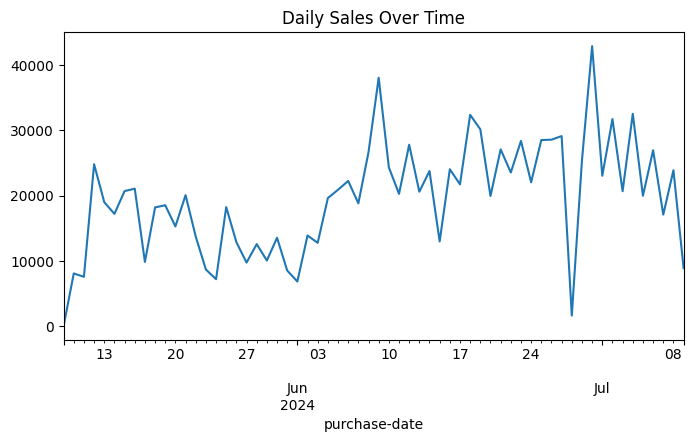

In [ ]:
# Basic statistics
print(sdf.describe())
import matplotlib.pyplot as plt
import seaborn as sns

# Sales over time
sdf['purchase-date'] = pd.to_datetime(sdf['purchase-date'], format='%d.%m.%Y %H:%M:%S PDT') # Specify the correct format
sales_over_time = sdf.groupby('purchase-date')['price'].sum().resample('D').sum()
plt.figure(figsize=(8,4))
sales_over_time.plot()
plt.title('Daily Sales Over Time')
plt.show()

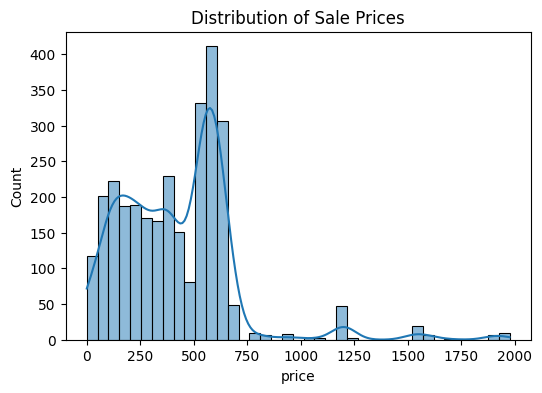

In [ ]:
# Price analysis
plt.figure(figsize=(6,4))
sns.histplot(sdf['price'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

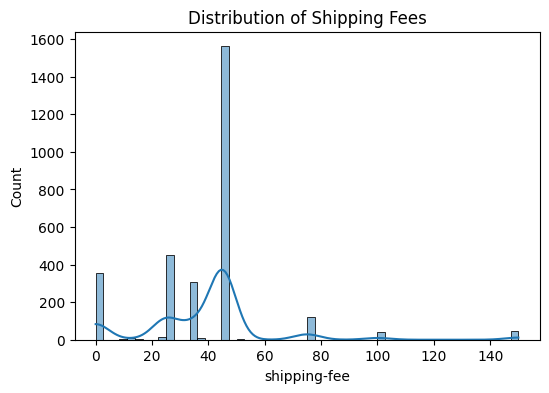

In [ ]:
# Shipping fee analysis
plt.figure(figsize=(6,4))
sns.histplot(sdf['shipping-fee'], kde=True)
plt.title('Distribution of Shipping Fees')
plt.show()

<ipython-input-57-b6ea1e1d5a04>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


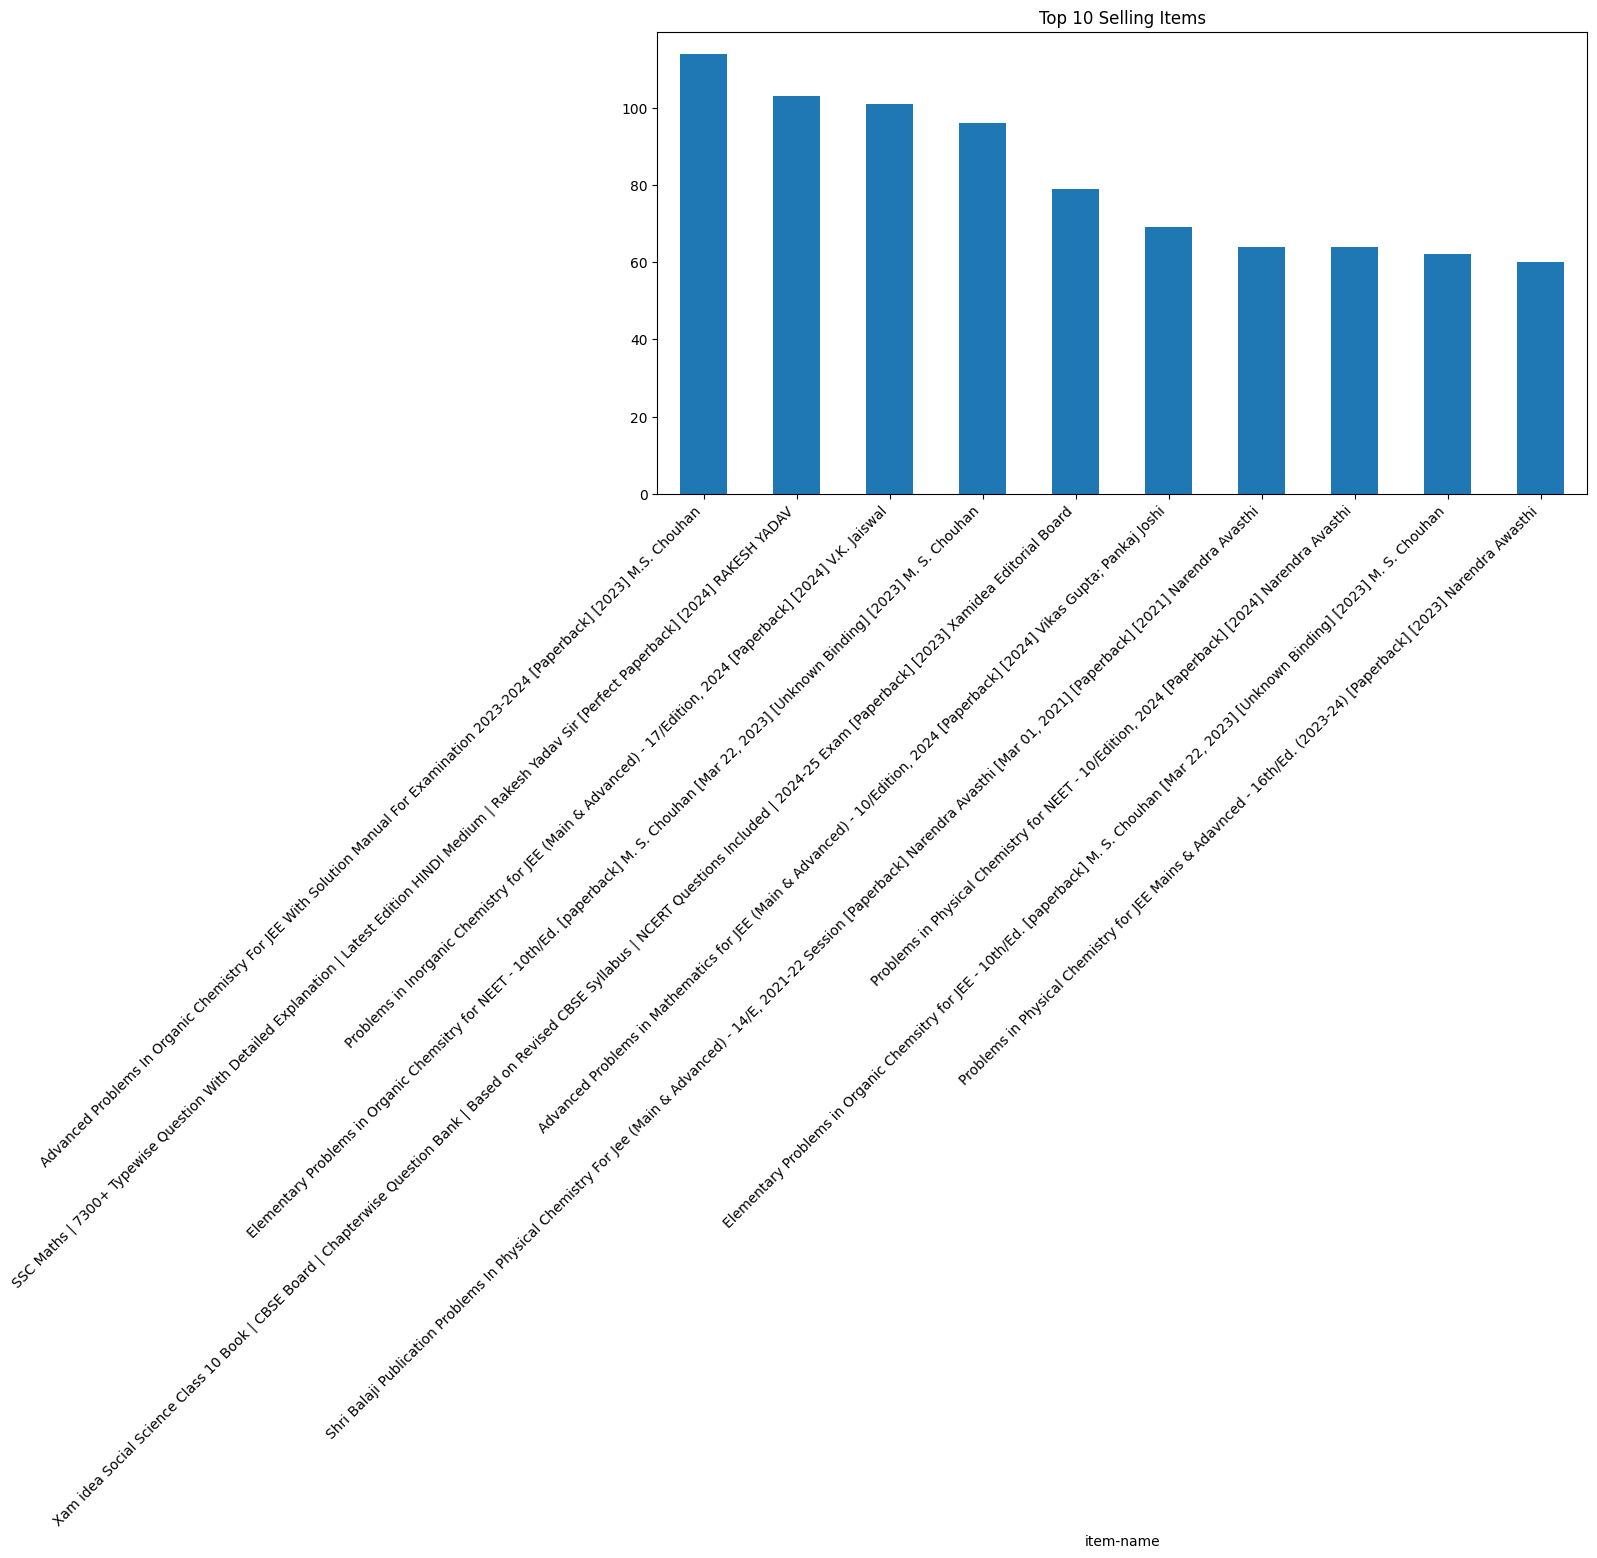

In [ ]:
# Top selling items
top_sellers = sdf.groupby('item-name')['quantity_sold'].sum().sort_values(ascending=False).head(10) # Use ascending=False to sort in descending order
plt.figure(figsize=(12, 6))
top_sellers.plot(kind='bar')
plt.title('Top 10 Selling Items')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 products with declining sales:
item-name
Elementary Problems in Organic Chemsitry for NEET - 10th/Ed. [paperback] M. S. Chouhan [Mar 22, 2023] [Unknown Binding] [2023] M. S. Chouhan                                                                                     -52.0
SSC Maths | 7300+ Typewise Question With Detailed Explanation | Latest Edition HINDI Medium | Rakesh Yadav Sir [Perfect Paperback] [2024] RAKESH YADAV                                                                           -27.0
Handbook of Banking Information - 52/edition 2023 EXAM [Paperback] [2022] N.S. Toor                                                                                                                                              -19.0
EYE MAKE - UP [Paperback] [2015] Navneet                                                                                                                                                                                         -15.0
Elementary Problems in Organ

<ipython-input-58-792bb5e51a4f>:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


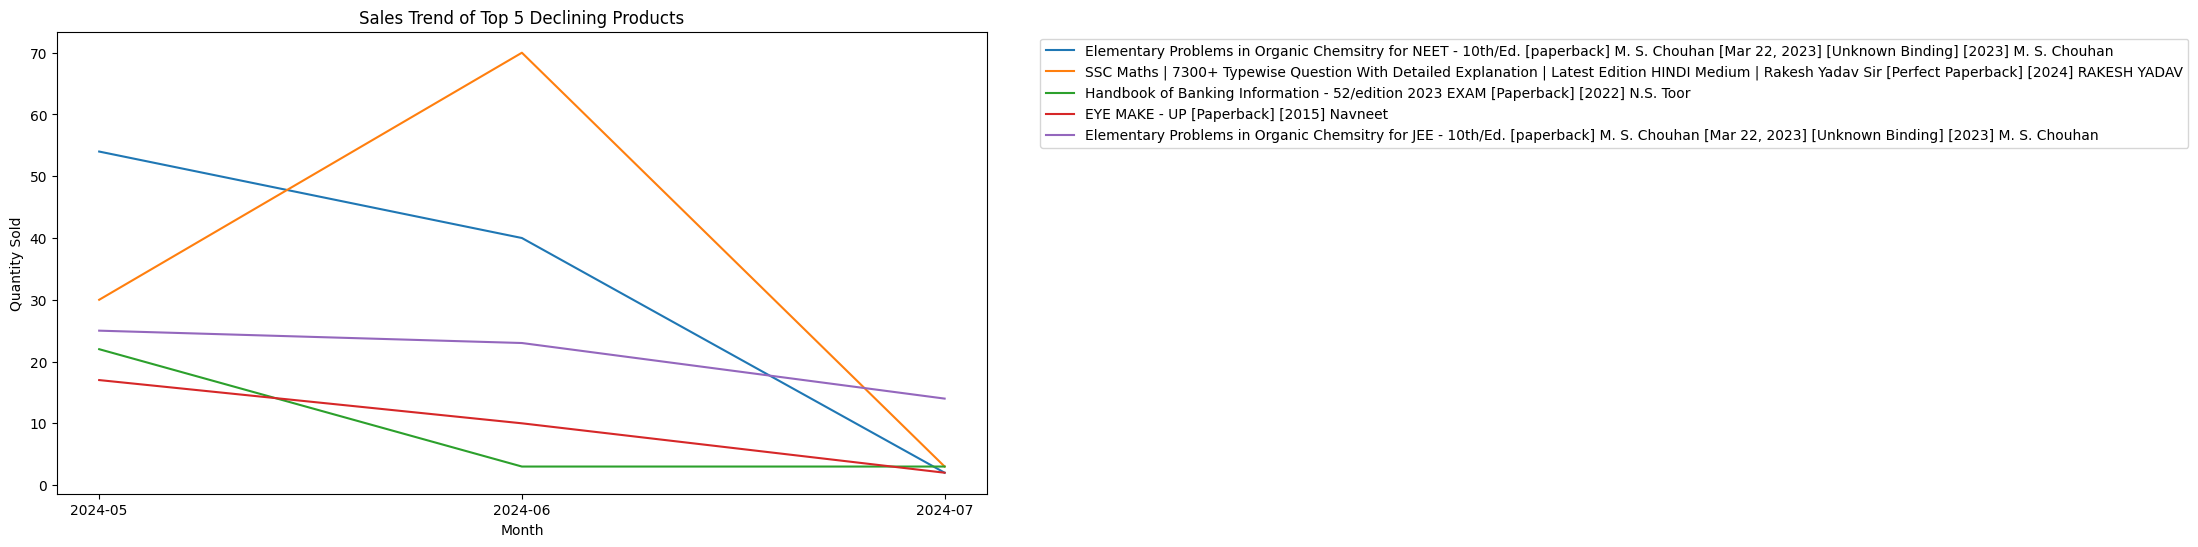


Products with more than 50% decline in sales:
item-name
Elementary Problems in Organic Chemsitry for NEET - 10th/Ed. [paperback] M. S. Chouhan [Mar 22, 2023] [Unknown Binding] [2023] M. S. Chouhan                                                                                     -96.296296
Sanskrit Swayam Shikshak [Paperback] [2013] Shripad D. Satvlekar                                                                                                                                                                 -90.000000
SSC Maths | 7300+ Typewise Question With Detailed Explanation | Latest Edition HINDI Medium | Rakesh Yadav Sir [Perfect Paperback] [2024] RAKESH YADAV                                                                           -90.000000
EYE MAKE - UP [Paperback] [2015] Navneet                                                                                                                                                                                         -88.235294

In [ ]:
#top 5 products with declining sales

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the second dataframe is named df2

# Step 1: Convert purchase-date to datetime if it's not already
# Use dayfirst=True to handle the reversed day and month
df2['purchase-date'] = pd.to_datetime(df2['purchase-date'], dayfirst=True)

# Step 2: Set a time frequency (e.g., monthly) and group data
df2['year_month'] = df2['purchase-date'].dt.to_period('M')


# Step 3: Calculate monthly sales for each product
monthly_sales = df2.groupby(['item-name', 'year_month'])['quantity_sold'].sum().unstack()

# Step 4: Calculate the trend for each product
def calculate_trend(row):
    return row.iloc[-1] - row.iloc[0]

sales_trend = monthly_sales.apply(calculate_trend, axis=1)

# Step 5: Identify products with declining sales
declining_products = sales_trend[sales_trend < 0].sort_values()

# Display top 10 products with the steepest decline
print("Top 10 products with declining sales:")
print(declining_products.head(10))
# Step 6: Visualize sales trend for top 5 declining products
top_5_declining = declining_products.head(5).index

plt.figure(figsize=(12, 6))
for product in top_5_declining:
    # Convert the monthly periods to strings for plotting
    plt.plot(monthly_sales.columns.astype(str), monthly_sales.loc[product], label=product)

plt.title("Sales Trend of Top 5 Declining Products")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 7: Calculate percentage decline
percentage_decline = (monthly_sales.iloc[:, -1] - monthly_sales.iloc[:, 0]) / monthly_sales.iloc[:, 0] * 100
significant_decline = percentage_decline[percentage_decline < -50].sort_values()

print("\nProducts with more than 50% decline in sales:")
print(significant_decline)

EDA ON COMBINED DATA OF THE ABOVE WRANGLED DATA SETS


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge dataframes
merged_df = pd.merge(df1, df2, left_on=['item-name', 'seller-sku'], right_on=['item-name', 'sku'], how='outer')

# Check the shape of the merged dataframe
print(merged_df.shape)
print(merged_df.columns)

(4613, 16)
Index(['item-name', 'listing-id', 'seller-sku', 'quantity_listed', 'open-date',
       'asin1', 'status', 'mrp', 'sku', 'selling_price', 'shipping-fee',
       'purchase-date', 'buyer-email', 'date-listed', 'quantity_sold',
       'year_month'],
      dtype='object')


In [ ]:
print(merged_df.info())
print(merged_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4613 entries, 0 to 4612
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   item-name        4613 non-null   object        
 1   listing-id       1865 non-null   object        
 2   seller-sku       1865 non-null   object        
 3   quantity_listed  1865 non-null   float64       
 4   open-date        1865 non-null   object        
 5   asin1            1865 non-null   object        
 6   status           1865 non-null   object        
 7   mrp              1865 non-null   float64       
 8   sku              2931 non-null   object        
 9   selling_price    2931 non-null   float64       
 10  shipping-fee     2931 non-null   float64       
 11  purchase-date    2931 non-null   datetime64[ns]
 12  buyer-email      2930 non-null   object        
 13  date-listed      2809 non-null   object        
 14  quantity_sold    2931 non-null   float64

Analyze time to sell
Calculate the time between listing and sale.

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


count     183.000000
mean      314.901639
std       362.681029
min         0.000000
25%        70.000000
50%       109.000000
75%       624.500000
max      1212.000000
Name: days_to_sell, dtype: float64


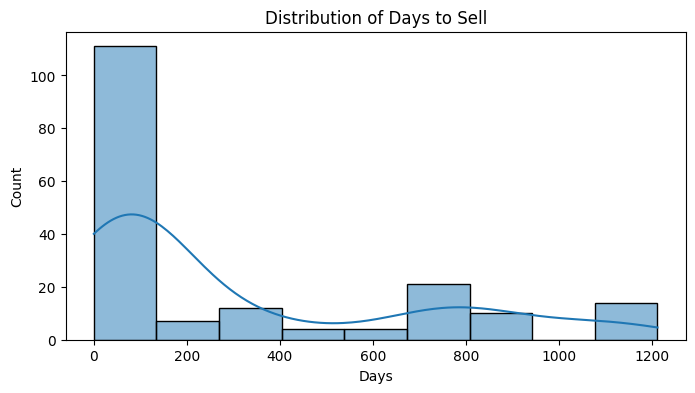

In [ ]:
merged_df['open_date'] = pd.to_datetime(merged_df['open-date'])
merged_df['purchase_date'] = pd.to_datetime(merged_df['purchase-date'])
merged_df['days_to_sell'] = (merged_df['purchase_date'] - merged_df['open_date']).dt.days

print(merged_df['days_to_sell'].describe())

plt.figure(figsize=(8,4))
sns.histplot(merged_df['days_to_sell'], kde=True)
plt.title('Distribution of Days to Sell')
plt.xlabel('Days')
plt.show()

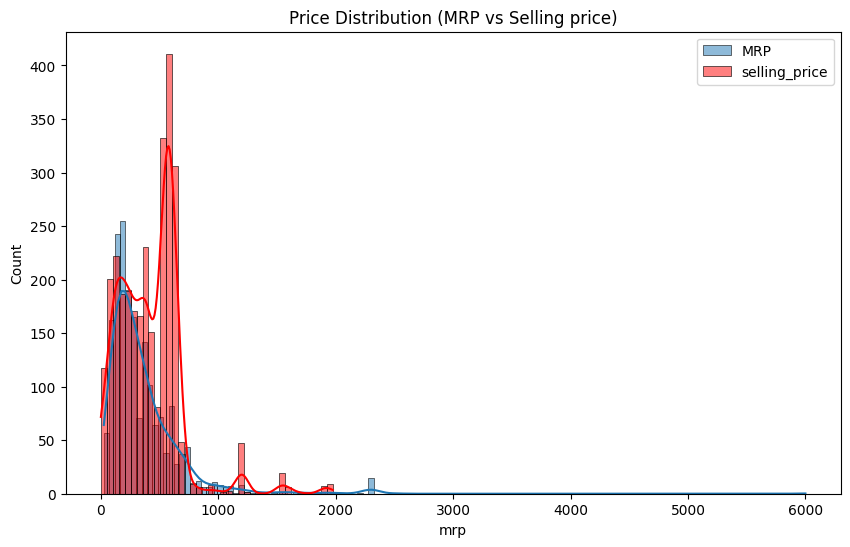

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['mrp'], kde=True, label='MRP')
sns.histplot(merged_df['selling_price'], kde=True, color='red', label='selling_price')
plt.title('Price Distribution (MRP vs Selling price)')
plt.legend()
plt.show()

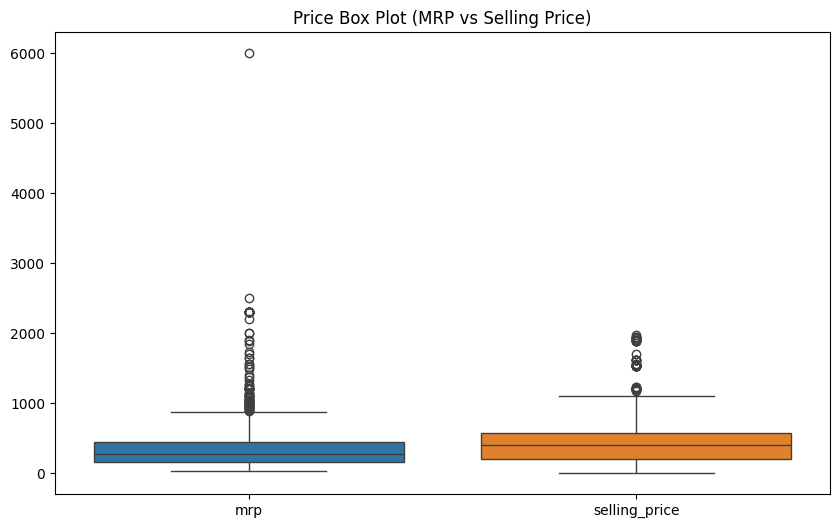

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[['mrp', 'selling_price']])
plt.title('Price Box Plot (MRP vs Selling Price)')
plt.show()

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


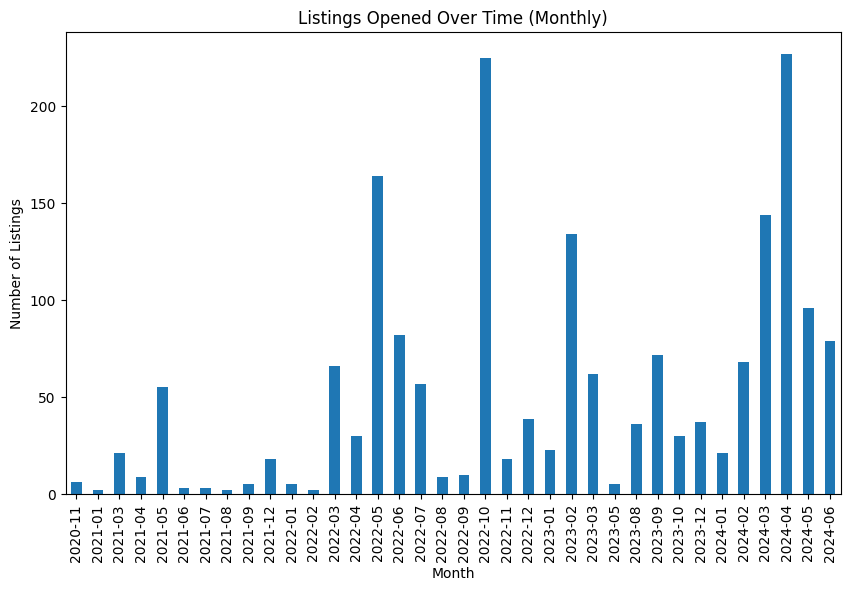

In [ ]:
merged_df['open-date'] = pd.to_datetime(merged_df['open-date'], errors='coerce')

plt.figure(figsize=(10, 6))
merged_df['open-date'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Listings Opened Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.show()